<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading 

**Chapter 05 &mdash; Predicting Market Movements with Machine Learning**

## Using Linear Regression for Market Movement Prediction

### A Quick Review of Linear Regression

In [1]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'
import warnings
warnings.filterwarnings(action='ignore') 

C:\Users\ASIA\AppData\Local\Temp\ipykernel_26748\867291448.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
x = np.linspace(0, 10)
# 0,10 사이의 X값에 대해 간격이 균일한 부동소수점 수 격자생성

In [3]:
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [4]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds() # <4>

In [5]:
y = x + np.random.standard_normal(len(x))

In [6]:
y

array([-1.74976547,  0.54676204,  1.56119907,  0.35980886,  1.79764732,
        1.534627  ,  1.44566947,  0.3585281 ,  1.44315723,  2.09173614,
        1.58278934,  2.68006145,  1.86538454,  3.4699083 ,  3.52986366,
        2.95681335,  2.73402575,  4.49912044,  3.23533377,  2.75923277,
        5.70061431,  5.82731946,  4.23791678,  3.85144181,  5.08247787,
        6.03912302,  6.03712279,  6.87176021,  5.38804766,  5.97404336,
        6.34484859,  4.88331362,  5.77425994,  7.55114789,  7.68922027,
        6.68691022,  8.53656104,  5.86040358,  6.39870299,  6.72674916,
        7.61882614,  7.6991752 ,  8.57874313,  8.16257147, 10.27933991,
        7.45057785,  8.404445  ,  9.94934449,  8.18233986, 11.47071387])

In [7]:
reg = np.polyfit(x, y, deg=1)
# 최소자승법(OLS: Ordinary Least Squares) ->차수가 1인 OLS회귀(선형회귀)
# p = polyfit(x,y,n)은 y의 데이터에 대한 최적의 피팅(최소제곱 관점에서)인 n차 다항식 p(x)의 계수를 반환합니다.(계수 -> weight)
# p의 계수는 내림차순으로 나열되고, p의 길이는 n+1입니다.

In [8]:
reg
# 최적의 파라미터 값

array([0.94612934, 0.22855261])

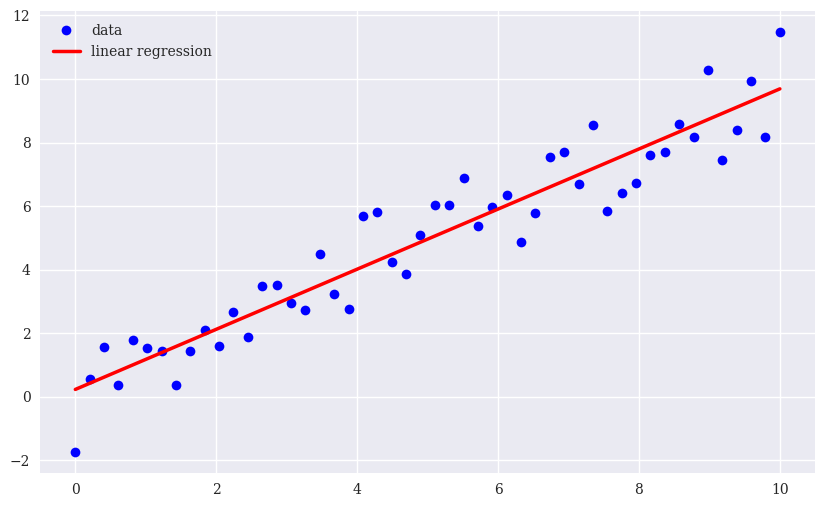

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')            # 데이터, 파란 점
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5,  # 회귀직선, 빨간 선
         label='linear regression')
plt.legend(loc=0);
# plt.savefig('../../images/ch05/lr_plot_1.png')

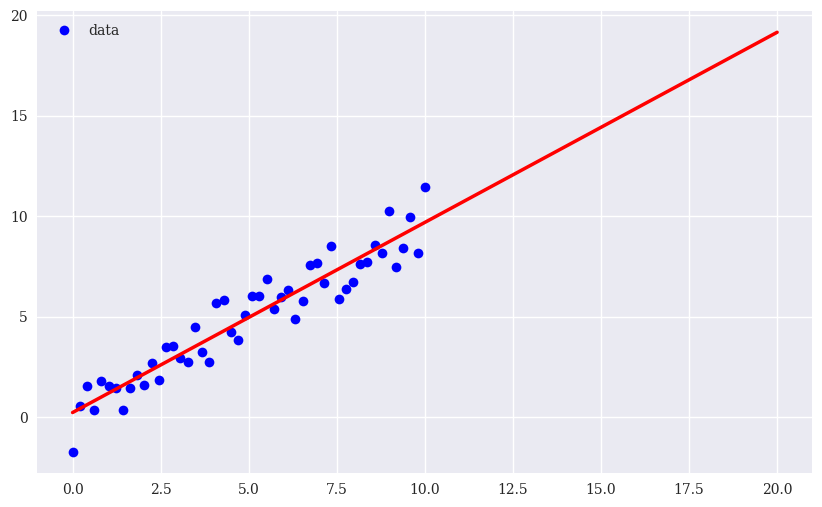

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)                               # np.linspace : Return evenly spaced numbers over a specified interval.
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5)        # np.polyval(reg, xn) : 다항식의 계산 결과를 반환
plt.legend(loc=0)
# plt.savefig('../../images/ch05/lr_plot_2.png')
# Extrapolaion(보외법) : 수학에서 원래의 관찰 범위를 넘어서서 다른 변수와의 관계에 기초하여 변수의 값을 추정하는 과정

### The Basic Idea for Price Prediction
* 나 이거 잘 모르겠어!!!!!

In [11]:
x = np.arange(12)

In [12]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [13]:
lags = 3
# 입력으로 사용되는 날짜 수
# 오늘과 이전의 두가지 지수 -> 3시차

In [14]:
m = np.zeros((lags + 1, len(x) - lags))
# np.zeros((i,j)) :  Return a new array of given shape and type, filled with zeros.

In [15]:
m

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
m[lags]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
x[lags:]

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [18]:
x[3:0]

array([], dtype=int32)

In [19]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]    # 기저 basis 벡터들(독립변수) 정의 (original data)

* 선형대수학에서, 어떤 벡터 공간의 기저(basis)는 그 벡터 공간을 선형생성하는 선형독립인 벡터들이다. 달리 말해, 벡터 공간의 임의의 벡터에게 선형결합으로서 유일한 표현을 부여하는 벡터들이다.

In [20]:
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [21]:
m[:3].T

array([[ 0.,  1.,  2.],
       [ 1.,  2.,  3.],
       [ 2.,  3.,  4.],
       [ 3.,  4.,  5.],
       [ 4.,  5.,  6.],
       [ 5.,  6.,  7.],
       [ 6.,  7.,  8.],
       [ 7.,  8.,  9.],
       [ 8.,  9., 10.]])

In [22]:
m[3] 

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

<img src='https://mblogthumb-phinf.pstatic.net/20130706_286/changkh_1373042359539aWBDg_JPEG/%25EC%258A%25A4%25ED%2581%25AC%25EB%25A6%25B0%25EC%2583%25B7_2013-07-06_%25EC%2598%25A4%25EC%25A0%2584_1.38.35.png?type=w800'>

* ★★★ linalg.lstsq(a, b, rcond='warn') ★★★
    - Return the least-squares solution to a linear matrix equation.
    - a(M, N) array_like “Coefficient” matrix. 계수
    - b{(M,), (M, K)} array_like Ordinate or “dependent variable” values. If b is two-dimensional, the least-squares solution is calculated for each of the K columns of b. 독립변수

In [23]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]
# m[:lags].T : original data // m[lags] : 종속변수
# 선형 OLS 회귀 구현
# Return the least-squares solution(최소 자승법의 해) to a linear matrix equation

In [24]:
reg
# 최적 파라미터 -> 오차를 최소화하는 회귀식의 계수

array([-0.66666667,  0.33333333,  1.33333333])

In [25]:
np.dot(m[:lags].T, reg)
# 예측결과 산출

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### Predicting Index Levels

In [26]:
import pandas as pd

In [27]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna()

In [28]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [29]:
symbol = 'EUR='

In [30]:
data = pd.DataFrame(raw[symbol])

In [31]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [32]:
data.head(3)

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412


In [33]:
lags = 5

In [34]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag) # <1> # price 열을 가져와서 lag에 맞춰 옮긴다
    cols.append(col)
data.dropna(inplace=True)

In [35]:
data.head(2)

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368


In [36]:
data[cols].head(2)

,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,
2010-01-11,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4513,1.4412,1.4318,1.4412,1.4368


In [37]:
reg = np.linalg.lstsq(data[cols], data['price'],
                      rcond=None)[0]
# 선형 OLS 회귀 구현
# Return the least-squares solution(최소 자승법의 해) to a linear matrix equation
# 회귀모형 적합할 때 최소자승법(Least-squares method)으로 잔차 제곱합을 최소화하는 '회귀계수'를 추정합니다. 

In [38]:
reg
# 최적 파라미터

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [39]:
data['prediction'] = np.dot(data[cols], reg)

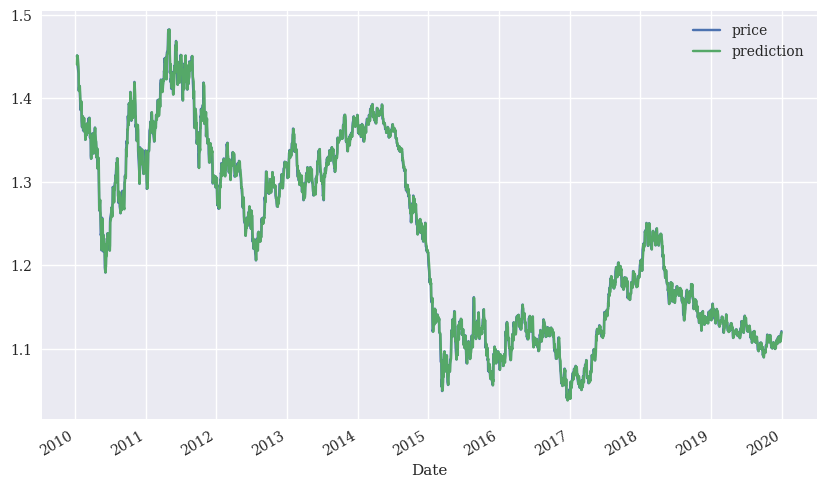

In [40]:
data[['price', 'prediction']].plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/lr_plot_3.png')
# 익일물 환율 예측값이 대략적으로 당일물의 환율과 같다

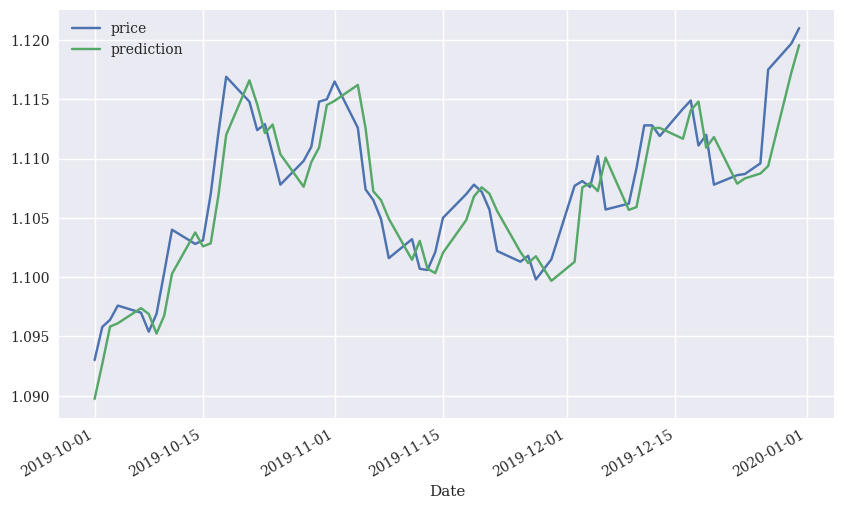

In [41]:
data[['price', 'prediction']].loc['2019-10-1':].plot(
            figsize=(10, 6));
# plt.savefig('../../images/ch05/lr_plot_4.png')
# 3개월(단기) -> 두 시계열 구분

### Predicting Future Returns

In [42]:
data['return'] = np.log(data['price'] /
                         data['price'].shift(1))
# 로그 수익이 시계열 데이터를 정상적이게(stationary) 한다

In [43]:
data.dropna(inplace=True)

In [44]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag) # <3>
    cols.append(col)
data.dropna(inplace=True)

In [45]:
data.head(2)

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.429671,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.410560,-0.000780


In [46]:
reg = np.linalg.lstsq(data[cols], data['return'],
                      rcond=None)[0]
# coefficient : data[cols]
# 독립변수 : data['return']

In [47]:
reg

array([-0.015689  ,  0.00890227, -0.03634858,  0.01290924, -0.00636023])

In [48]:
data['prediction'] = np.dot(data[cols], reg)

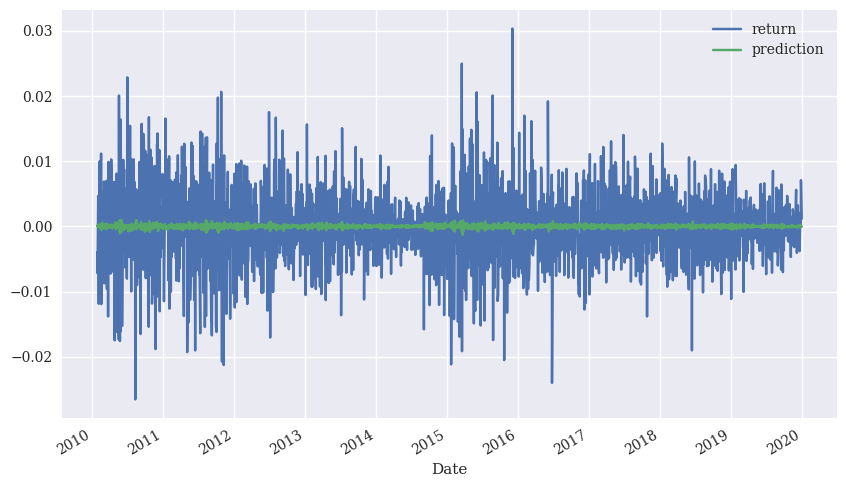

In [49]:
data[['return', 'prediction']].iloc[lags:].plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/lr_plot_5.png')
#선형회귀만으로는 미래 수익 규모를 제대로 예측하지 못한다

### Prediction Future Market Direction

In [50]:
hits = np.sign(data['return'] *
               data['prediction']).value_counts()
# np.sign : 양수이면 1 음수면 -1, 0이면 0으로 만들어준다.

In [51]:
hits
# 선형회귀를 사용해 방향을 제대로 예측할때마다, 즉 예측 수익의 부호가 정확하다는 점을 의미할때 -> 시장 수익 * 예측수익 == 양수(+)

 1.0    1250
-1.0    1242
 0.0      13
dtype: int64

In [52]:
hits.values[0] / sum(hits)
# hit ratio(적중률), 1250번 적중, 1242번 적중 X
# 특정 기간 동안, 최고인 날과 최악인 날을 정확하게 예측하는 전략은 명중률이 50%미만인 경우에도 시장 능가할 수 있다
# 명중률이 50%를 훨씬 넘는 전략은 드물고, 큰 움직임이 잘못되면 여전히 기준 수단보다 실적이 낮을 수도 있다

0.499001996007984

### Vectorized Backtesting of Regression-based Strategy 

In [53]:
data.head(2)

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,0.000061,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,0.000453,-0.000780


In [54]:
data['strategy'] = data['prediction'] * data['return']
# 예측 값들(포지셔닝)에 시장 수익을 곱한다

In [55]:
data[['return', 'strategy']].sum().apply(np.exp)
# 기준수단(상품)의 총 성과와 전략에 따른 총 성과

return      0.784026
strategy    1.000154
dtype: float64

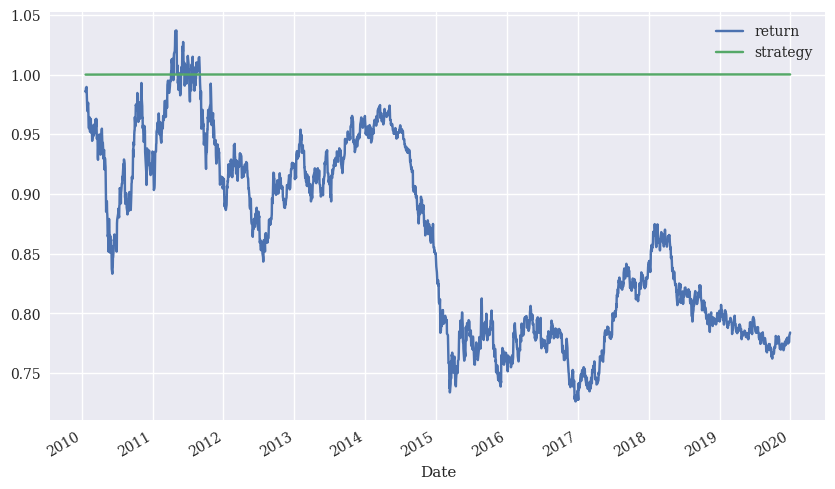

In [56]:
data[['return', 'strategy']].dropna().cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/lr_plot_6.png')

### Generalizing the Approach

★★★ 표본내 적합화(in-sample fitting), 표본 외 평가(out-of-sample evaluation) ★★★
* a within sample forecast from 1980 to 2015 might use data from 1980 to 2012 to estimate the model. Using this model, the forecaster would then predict values for 2013-2015 and compare the forecasted values to the actual known values. An out of sample forecast instead uses all available data in the sample to estimate a models. For the previous example, estimation would be performed over 1980-2015, and the forecast(s) would commence in 2016

In [57]:
import LRVectorBacktester as LR

In [58]:
lrbt = LR.LRVectorBacktester('EUR=', '2010-1-1', '2019-12-31',
                                     10000, 0.0)

In [59]:
# a within sample forecast
lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=5)
# 똑같은 데이터 집합 사용, 전략을 훈련 + 평가도
#  def run_strategy(self, start_in, end_in, start_out, end_out, lags=3
# gross performance of the strategy, out-/underperformance of strategy(전략수익 - 변동률)

(17166.53, 9442.42)

In [60]:
# out-of-sample evaluation
lrbt.run_strategy('2010-1-1', '2017-12-31',
                  '2018-1-1', '2019-12-31', lags=5)
# 훈련 단계와 평가 단계에 서로 다른 데이터셋을 사용

(10160.86, 791.87)

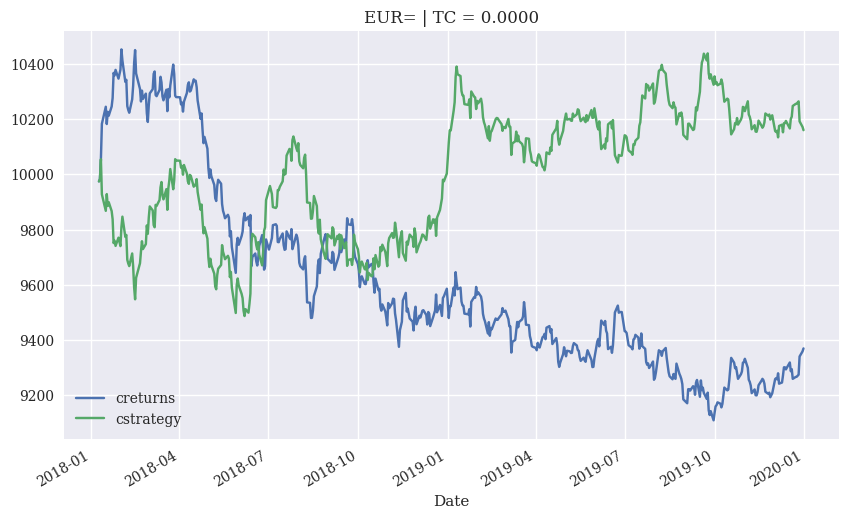

In [61]:
lrbt.plot_results()
# plt.savefig('../../images/ch05/lr_plot_7.png')
# 시장과 비교한 표본 외 전략 성과

In [62]:
lrbt = LR.LRVectorBacktester('GDX', '2010-1-1', '2019-12-31',
                                     10000, 0.002)
# 거래비용 0.002

In [63]:
lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=7)  

(23642.32, 17649.69)

In [64]:
lrbt.run_strategy('2010-1-1', '2014-12-31',
                  '2015-1-1', '2019-12-31', lags=7)

(28513.35, 14888.41)

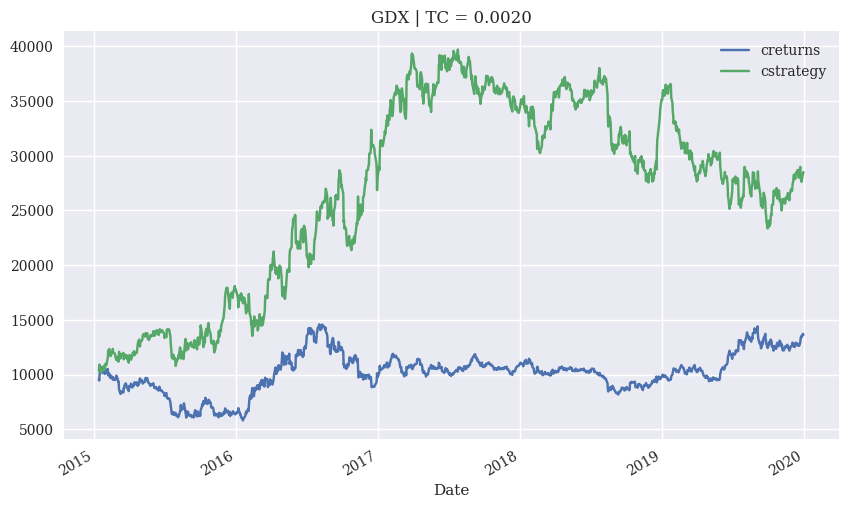

In [65]:
lrbt.plot_results()
# plt.savefig('../../images/ch05/lr_plot_8.png')

## Using Machine Learning for Market Movement Prediction

### Linear Regression with scikit-learn

In [66]:
x = np.arange(12)

In [67]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [68]:
lags = 3

In [69]:
m = np.zeros((lags + 1, len(x) - lags))

In [70]:
m

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [71]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [72]:
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [73]:
from sklearn import linear_model

In [74]:
lm = linear_model.LinearRegression()

In [75]:
m[:lags].T

array([[ 0.,  1.,  2.],
       [ 1.,  2.,  3.],
       [ 2.,  3.,  4.],
       [ 3.,  4.,  5.],
       [ 4.,  5.,  6.],
       [ 5.,  6.,  7.],
       [ 6.,  7.,  8.],
       [ 7.,  8.,  9.],
       [ 8.,  9., 10.]])

In [76]:
m[lags]

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [77]:
lm.fit(m[:lags].T, m[lags])

LinearRegression()

In [78]:
lm.coef_

array([0.33333333, 0.33333333, 0.33333333])

In [79]:
lm.intercept_

2.0

In [80]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [81]:
lm = linear_model.LinearRegression(fit_intercept=False)
# 절편값 없이 적합화 강제 -> 넘파이 및 polyfit에서와 똑같은 회귀 결과 제공

In [82]:
lm.fit(m[:lags].T, m[lags])

LinearRegression(fit_intercept=False)

In [83]:
lm.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [84]:
lm.intercept_
# 절편값

0.0

In [85]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### A Simple Classification Problem

In [95]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])
hours.shape
# 시험 준비 공부 시간

(20,)

In [88]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1])
# 시험 합격 여부

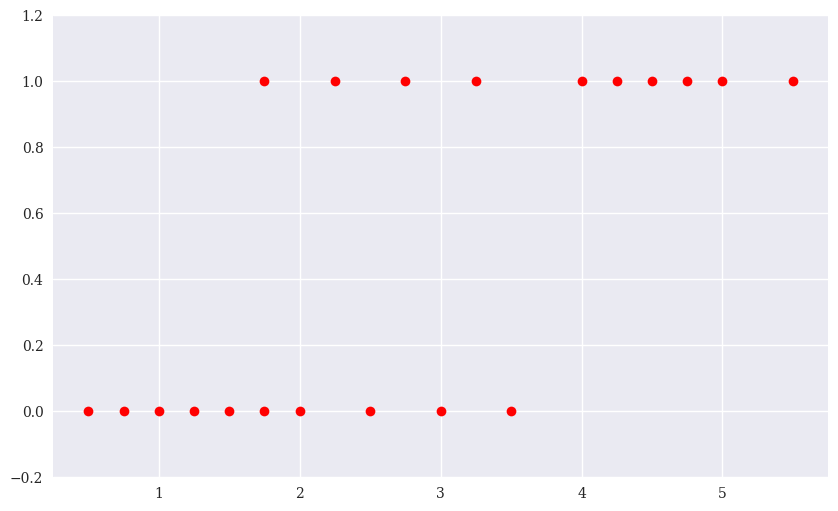

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.ylim(-0.2, 1.2);
# plt.savefig('../../images/ch05/ml_plot_1.png')

In [90]:
reg = np.polyfit(hours, success, deg=1)
# 선형회귀 구현

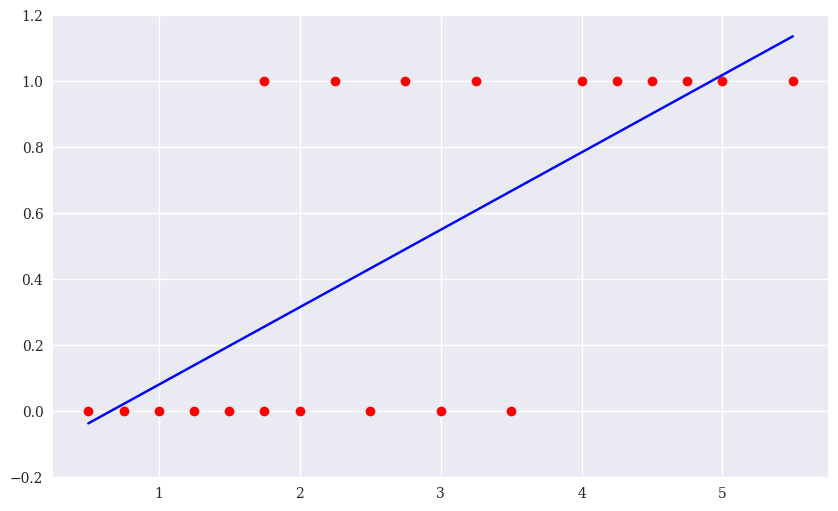

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, np.polyval(reg, hours), 'b')
plt.ylim(-0.2, 1.2);
# plt.savefig('../../images/ch05/ml_plot_2.png')
# 회귀선 그린다

In [92]:
lm = linear_model.LogisticRegression(solver='lbfgs')

In [93]:
hrs = hours.reshape(1, -1).T
# (20,) -> (20, 1)

In [97]:
lm.fit(hrs, success)

LogisticRegression()

In [98]:
prediction = lm.predict(hrs)

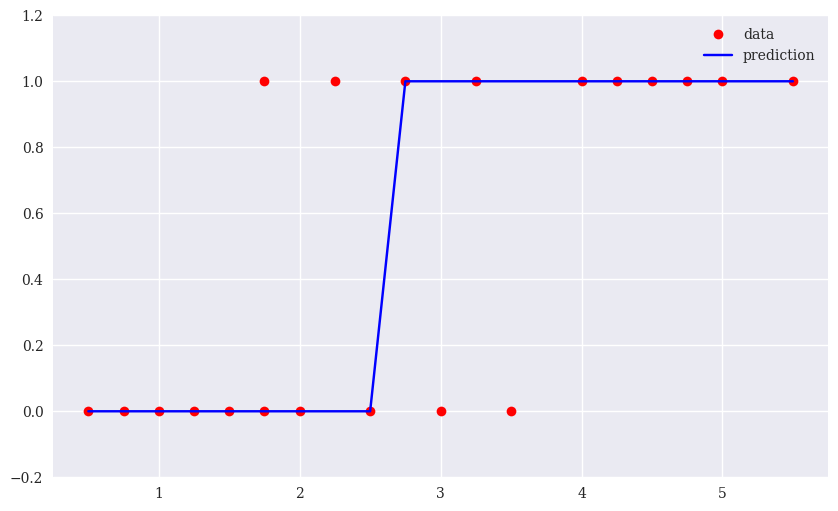

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro', label='data')
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc=0)
plt.ylim(-0.2, 1.2);
# plt.savefig('../../images/ch05/ml_plot_3.png')

In [100]:
prob = lm.predict_proba(hrs)

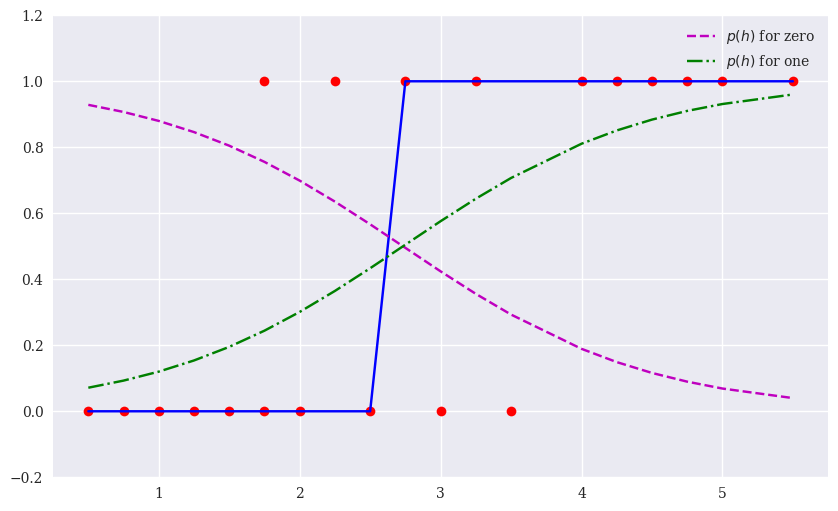

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, prediction, 'b')
plt.plot(hours, prob.T[0], 'm--',
         label='$p(h)$ for zero')  # 실패확률
plt.plot(hours, prob.T[1], 'g-.',
         label='$p(h)$ for one')   # 성공확률
plt.ylim(-0.2, 1.2)
plt.legend(loc=0);
# plt.savefig('../../images/ch05/ml_plot_4.png')
# 성공확률과 실패확률을 예측

### Using Logistic Regression to Predict Market Direction

In [ ]:
# 일반적 회귀상황에서의 독립변수(설명변수) == 머신러닝의 피쳐
# 시계열 예측 -> 1개 시차사용 -> 1개 피쳐 식별
#            -> 3개 시차사용 -> 3개 피쳐
# 피쳐 행렬(feature matrix)

#### 3_lags

In [102]:
symbol = 'GLD'

In [103]:
data = pd.DataFrame(raw[symbol])

In [104]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [105]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [106]:
data.dropna(inplace=True)

In [107]:
lags = 3

In [108]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['return'].shift(lag)
    cols.append(col)

In [109]:
data.dropna(inplace=True)

In [113]:
data[cols][:3]

,lag_1,lag_2,lag_3
Date,,,
2010-01-08,-0.006207,0.016365,-0.000911
2010-01-11,0.004951,-0.006207,0.016365
2010-01-12,0.013202,0.004951,-0.006207


In [111]:
from sklearn.metrics import accuracy_score

In [112]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                     multi_class='auto',
                                     max_iter=1000)
# C : 규제 강도, 작을 수록 큰 규제강도

In [114]:
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [115]:
data['prediction'] = lm.predict(data[cols])

In [116]:
data['prediction'].value_counts()
# 예측된 롱포지션, 숏포지션 갯수

 1.0    1983
-1.0     529
Name: prediction, dtype: int64

In [118]:
hits = np.sign(data['return'].iloc[lags:] *
               data['prediction'].iloc[lags:]
              ).value_counts()
# 정확한 예측과 잘못된 예측 횟수

In [119]:
hits

 1.0    1338
-1.0    1159
 0.0      12
dtype: int64

In [120]:
accuracy_score(data['prediction'],
               np.sign(data['return']))
# 정확도(명중률)

0.5338375796178344

In [121]:
data['strategy'] = data['prediction'] * data['return']
# 전략의 성과

In [122]:
data[['return', 'strategy']].sum().apply(np.exp)

return      1.289478
strategy    2.458716
dtype: float64

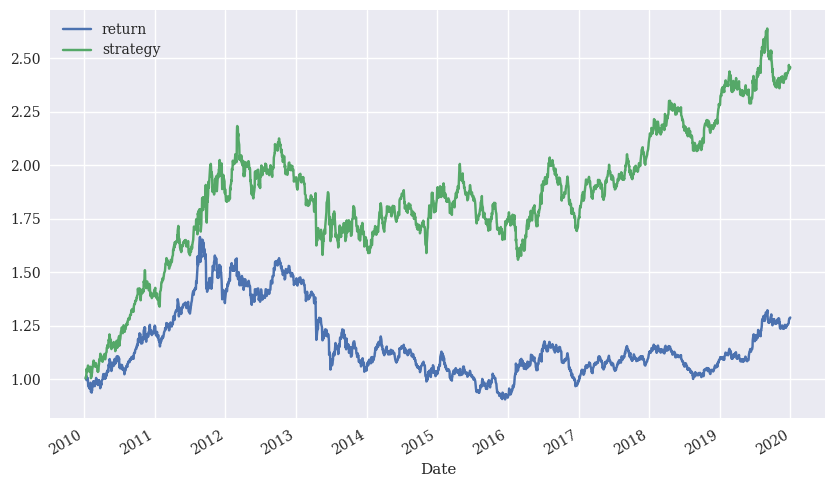

In [123]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6));
# plt.savefig('../../images/ch05/ml_plot_5.png')
# 패시브 벤치마크 투자(지표물 추종 투자)와 비교하면 높다

#### 5_lags

In [124]:
data = pd.DataFrame(raw[symbol])

In [125]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [126]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [127]:
lags = 5

In [128]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_%d' % lag
    data[col] = data['price'].shift(lag)
    cols.append(col)

In [129]:
data.dropna(inplace=True)

In [130]:
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [131]:
data['prediction'] = lm.predict(data[cols])

In [132]:
data['prediction'].value_counts()

 1.0    2055
-1.0     456
Name: prediction, dtype: int64

In [133]:
hits = np.sign(data['return'].iloc[lags:] *
               data['prediction'].iloc[lags:]
              ).value_counts()

In [134]:
hits

 1.0    1327
-1.0    1167
 0.0      12
dtype: int64

In [135]:
accuracy_score(data['prediction'],
               np.sign(data['return']))
# 시차 3보다 명중률 감소

0.5296694544006372

In [136]:
data['strategy'] = data['prediction'] * data['return']

In [137]:
data[['return', 'strategy']].sum().apply(np.exp)

return      1.283110
strategy    2.282757
dtype: float64

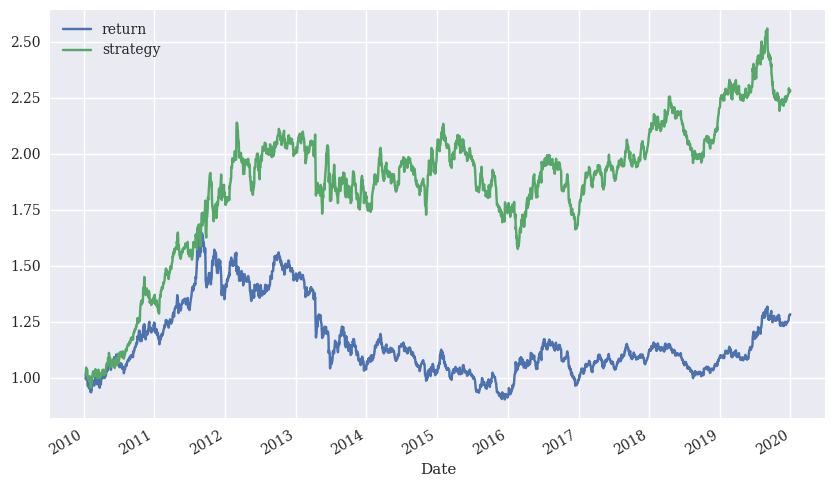

In [138]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6));
# plt.savefig('../../images/ch05/ml_plot_6.png')
# 시차 3보다 전략 성과는 상승

### Generalizing the Approach

In [139]:
import ScikitVectorBacktester as SCI

In [140]:
scibt = SCI.ScikitVectorBacktester('EUR=',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.0, 'logistic')

In [141]:
scibt.run_strategy('2015-1-1', '2019-12-31',
                   '2015-1-1', '2019-12-31', lags=15)

(12192.18, 2189.5)

In [142]:
scibt.run_strategy('2016-1-1', '2018-12-31',
                   '2019-1-1', '2019-12-31', lags=15)

(10580.54, 729.93)

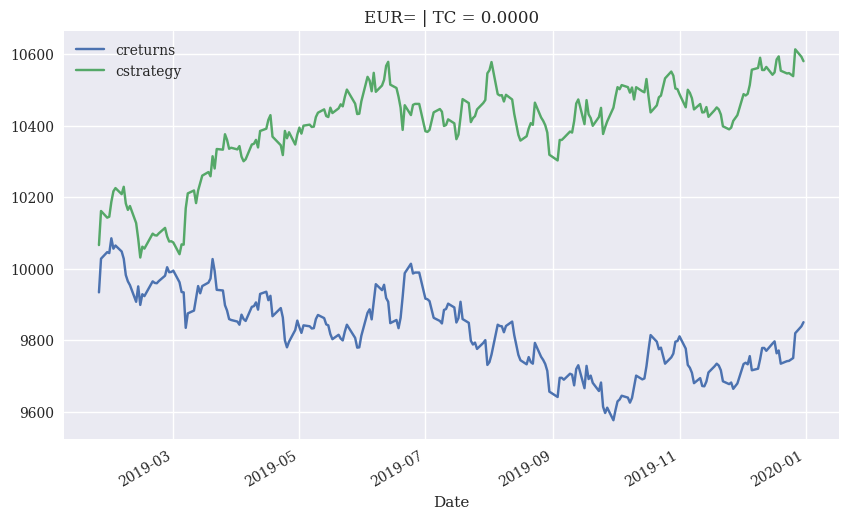

In [143]:
scibt.plot_results()
# plt.savefig('../../images/ch05/ml_plot_7.png')

In [144]:
scibt = SCI.ScikitVectorBacktester('GDX',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.00, 'logistic')

In [145]:
scibt.run_strategy('2013-1-1', '2017-12-31',
                   '2018-1-1', '2018-12-31', lags=10)

(12686.81, 4032.73)

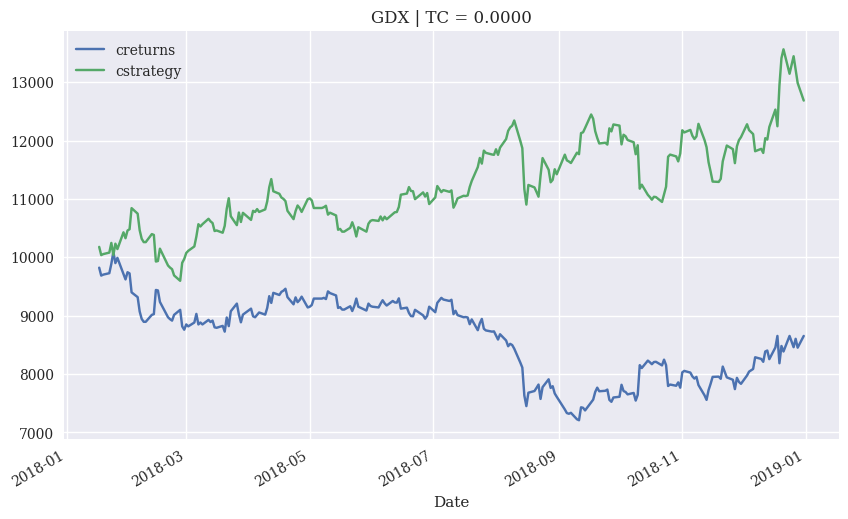

In [146]:
scibt.plot_results()
# plt.savefig('../../images/ch05/ml_plot_8.png')

In [147]:
scibt = SCI.ScikitVectorBacktester('GDX',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.0025, 'logistic')

In [148]:
scibt.run_strategy('2013-1-1', '2017-12-31',
                   '2018-1-1', '2018-12-31', lags=10)

(9588.48, 934.4)

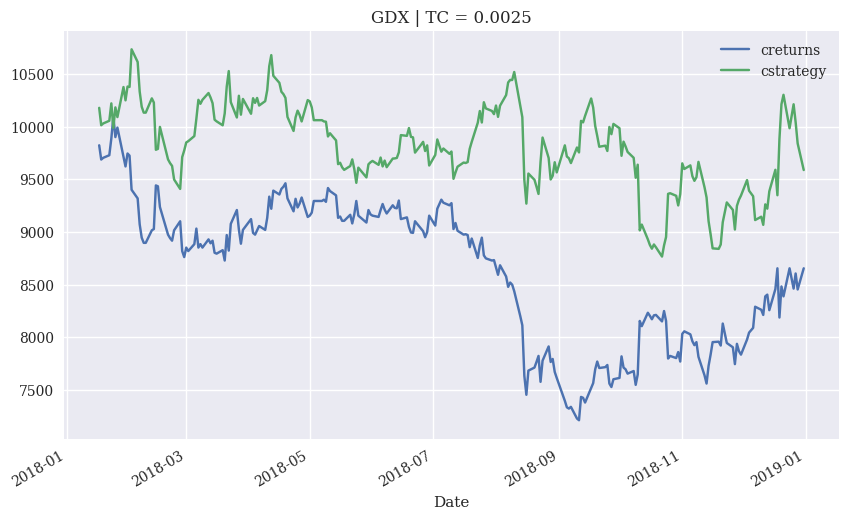

In [149]:
scibt.plot_results()
# plt.savefig('../../images/ch05/ml_plot_8_a.png')

## Using Deep Learning for Market Movement Prediction

#### The Simple Classification Problem Revisited 

In [ ]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [ ]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1]) 

In [ ]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [ ]:
data.info()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=[32],
                     max_iter=1000, random_state=100)

In [ ]:
model.fit(data['hours'].values.reshape(-1, 1), data['success'])

In [ ]:
data['prediction'] = model.predict(data['hours'].values.reshape(-1, 1)) # <2>

In [ ]:
data.tail()

In [ ]:
data.plot(x='hours', y=['success', 'prediction'],
          style=['ro', 'b-'], ylim=[-.1, 1.1],
          figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_1.png')

### Using Deep Neural Networks to Predict Market Direction

In [ ]:
symbol = 'EUR='

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [ ]:
data['return'] = np.log(data['price'] /
                         data['price'].shift(1)) 

In [ ]:
data['direction'] = np.where(data['return'] > 0, 1, 0)

In [ ]:
lags = 5


In [ ]:
cols = []
for lag in range(1, lags + 1): # <5>
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag) # <6>
    cols.append(col)
data.dropna(inplace=True) # <7>

In [ ]:
data.round(4).tail()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam

In [ ]:
optimizer = adam(learning_rate=0.0001)

In [ ]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)

In [ ]:
set_seeds()
model = Sequential()
model.add(Dense(64, activation='relu',
        input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # <5>
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cutoff = '2017-12-31'

In [ ]:
training_data = data[data.index < cutoff].copy()

In [ ]:
mu, std = training_data.mean(), training_data.std()

In [ ]:
training_data_ = (training_data - mu) / std

In [ ]:
test_data = data[data.index >= cutoff].copy()

In [ ]:
test_data_ = (test_data - mu) / std

In [ ]:
%%time
model.fit(training_data[cols],
          training_data['direction'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False)

In [ ]:
res = pd.DataFrame(model.history.history)

In [ ]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');
# plt.savefig('../../images/ch05/dnn_plot_metrics.png')

In [ ]:
model.evaluate(training_data_[cols], training_data['direction'])

In [ ]:
pred = model.predict_classes(training_data_[cols])

In [ ]:
pred[:30].flatten()

In [ ]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
training_data['strategy'] = (training_data['prediction'] *
                            training_data['return'])

In [ ]:
training_data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
training_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_2.png')

In [ ]:
model.evaluate(test_data_[cols], test_data['direction'])

In [ ]:
pred = model.predict_classes(test_data_[cols])

In [ ]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
test_data['prediction'].value_counts()

In [ ]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['return'])

In [ ]:
test_data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
test_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_3.png')

### Adding Different Types of Features

In [ ]:
data['momentum'] = data['return'].rolling(5).mean().shift(1)

In [ ]:
data['volatility'] = data['return'].rolling(20).std().shift(1)

In [ ]:
data['distance'] = (data['price'] - data['price'].rolling(50).mean()).shift(1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
cols.extend(['momentum', 'volatility', 'distance'])

In [ ]:
print(data.round(4).tail())

In [ ]:
training_data = data[data.index < cutoff].copy()

In [ ]:
mu, std = training_data.mean(), training_data.std()

In [ ]:
training_data_ = (training_data - mu) / std

In [ ]:
test_data = data[data.index >= cutoff].copy() 

In [ ]:
test_data_ = (test_data - mu) / std

In [ ]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
                input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
%%time 
model.fit(training_data_[cols], training_data['direction'],
          verbose=False, epochs=25)

In [ ]:
model.evaluate(training_data_[cols], training_data['direction'])

In [ ]:
pred = model.predict_classes(training_data_[cols])

In [ ]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
training_data['strategy'] = training_data['prediction'] * \
                            training_data['return']

In [ ]:
training_data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
training_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_4.png')

In [ ]:
model.evaluate(test_data_[cols], test_data['direction'])

In [ ]:
pred = model.predict_classes(test_data_[cols])

In [ ]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
test_data['prediction'].value_counts()

In [ ]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['return'])

In [ ]:
test_data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
test_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_5.png')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>